### 使用PCA + KNN对MNIST数据集进行手写数字识别

首先引入需要的包

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
path = os.path.abspath('..')
if not path in sys.path:
    sys.path.append(path)

载入数据集，使数据中心化（减去平均值）

In [134]:
from dataset.cleardata import mnist
train_img, train_lbl = mnist(dataset='training')
test_img, test_lbl = mnist(dataset='testing')

### 先看一下前16张训练机和数据集都长什么样， 使用plt画出图像

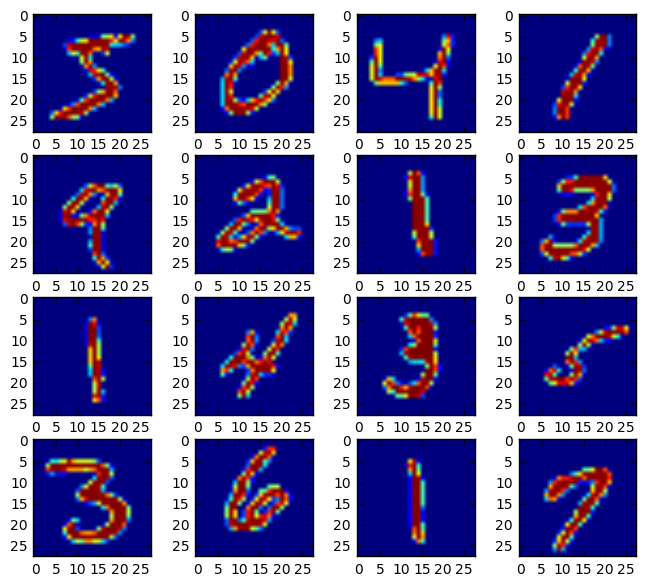

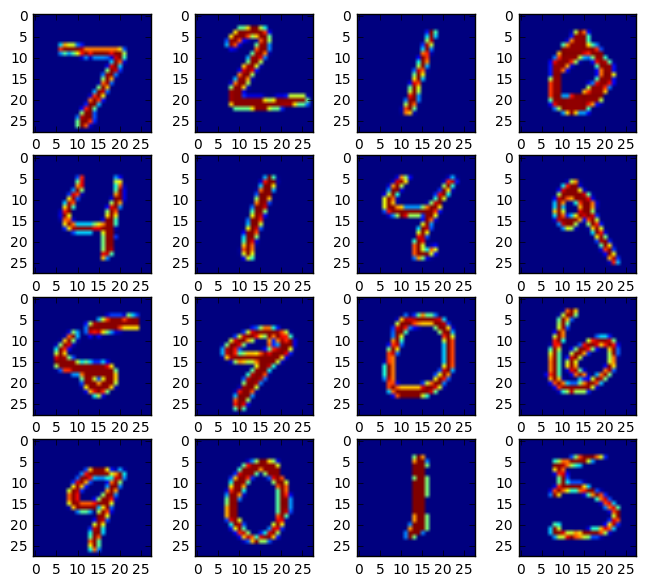

In [135]:
plt.figure(figsize=(8,7),dpi=198)

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_img[i])

plt.figure(figsize=(8,7),dpi=198)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_img[i])

__求出平均脸， 简单计算，其实就是把每个像素求出平均值__, 画出来看看， 就长这样

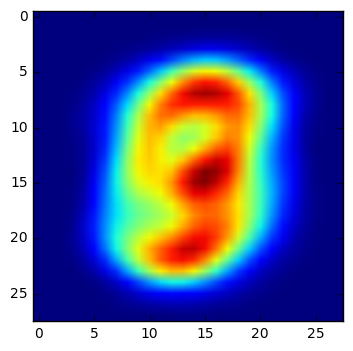

In [136]:
#mean face
mean_num = train_img.mean(0)
plt.imshow(mean_num)
train_img = train_img - mean_num
test_img = test_img - mean_num

### 所有图片都减去平均脸

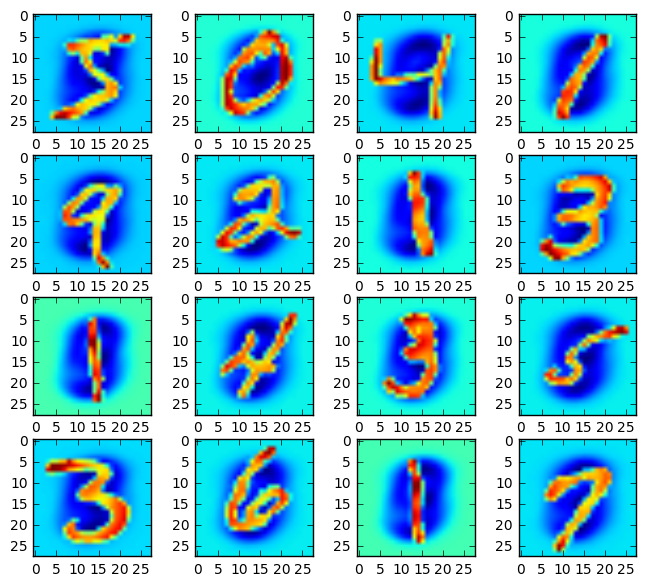

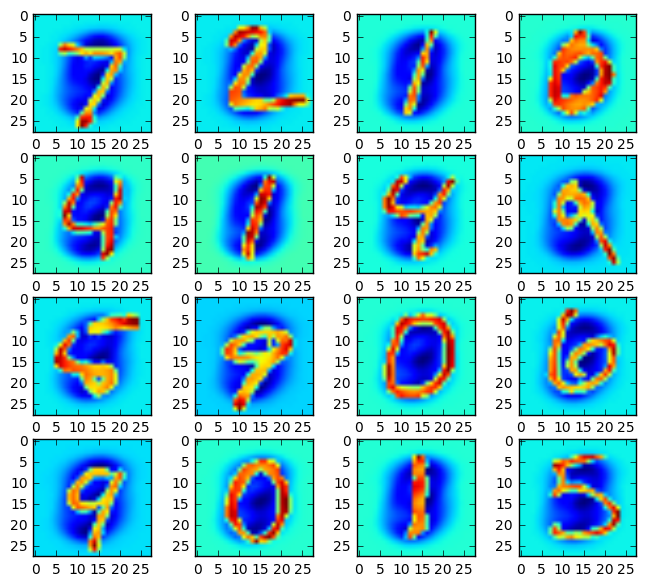

In [64]:
plt.figure(figsize=(8,7),dpi=198)

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_img[i])

plt.figure(figsize=(8,7),dpi=198)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_img[i])

### 把所有像素摊平（都变成以为向量）

In [96]:
train_plain = np.array([train_img[i].reshape(28 * 28, ) for i in xrange(train_img.shape[0])])
test_plain = np.array([test_img[i].reshape(28 * 28, ) for i in xrange(test_img.shape[0])])

### 执行PCA处理数据
这一步发现python报了一个异常， 可以看到python跑出一个错误
ComplexWarning: Casting complex values to real discards the imaginary part， 原因是pca求出来的特征向量有复数，这时候我舍弃了复数的虚部
> 以下取了40维进行PCA

In [138]:
from pre_process.pca import pca
data, ft = pca(plain, 40)

data = data.astype(float) # training data after pac mapping to 40 dimension
ft = ft.astype(float)

g:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
g:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


### 画出前16特征脸
这些特征脸按照投影方差大小排列， 第一个方差最大，效果应该会最好的

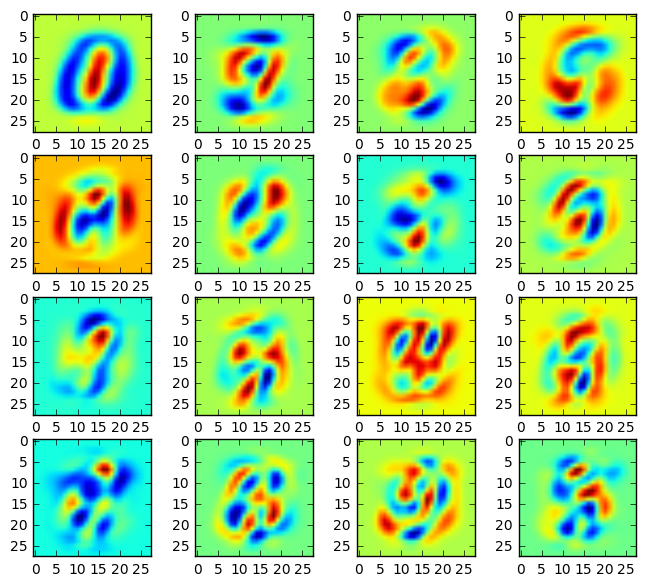

In [139]:
plt.figure(figsize=(8,7),dpi=198)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(ft.T[i].reshape(28, 28))

### 把测试数据使用40维的特征向量投影的40维平面

In [140]:
train_maped = np.dot(train_plain, ft)
test_maped = np.dot(test_plain, ft)

### 使用KNN算法，对测试数据进行比较
这里由于算法没有优化，复杂度比较高，所以只取了前1000的测试数据，有待优化
输出了预测label， 计算准确率

In [144]:
from algorithm import distance as dist
out_lbl = []
for i in xrange(1000):
    res = np.array([dist.euclidean(train_maped[m], maped[i]) for m in xrange(test_img.shape[0])])
    out_lbl.append(train_lbl[res.argsort()[0]])
out_lbl

[array([7], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([0], dtype=int8),
 array([4], dtype=int8),
 array([1], dtype=int8),
 array([9], dtype=int8),
 array([9], dtype=int8),
 array([5], dtype=int8),
 array([9], dtype=int8),
 array([0], dtype=int8),
 array([6], dtype=int8),
 array([9], dtype=int8),
 array([0], dtype=int8),
 array([1], dtype=int8),
 array([5], dtype=int8),
 array([9], dtype=int8),
 array([7], dtype=int8),
 array([3], dtype=int8),
 array([4], dtype=int8),
 array([9], dtype=int8),
 array([6], dtype=int8),
 array([6], dtype=int8),
 array([5], dtype=int8),
 array([4], dtype=int8),
 array([0], dtype=int8),
 array([7], dtype=int8),
 array([4], dtype=int8),
 array([0], dtype=int8),
 array([1], dtype=int8),
 array([3], dtype=int8),
 array([1], dtype=int8),
 array([3], dtype=int8),
 array([0], dtype=int8),
 array([7], dtype=int8),
 array([2], dtype=int8),
 array([7], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),


### 看一看错误率，还算比较小~ 到此结束 
但是只是作为测试使用， 还有很多东西还需要很多改进

In [142]:
np.sum(test_lbl[:1000] != out_lbl[:1000]) / 1000.0

0.059999999999999998